## We are using two CNNs with diff parameters to compare their accuracy on CIFAR10 data.

In [1]:
import numpy as np
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Conv2D, MaxPool2D, Flatten
import tensorflow.keras.utils as np_utils
from sklearn.metrics import accuracy_score

In [3]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

X_train = X_train.reshape(X_train.shape[0], 32, 32, 3)
X_test = X_test.reshape(X_test.shape[0], 32, 32, 3)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

170500096/170498071 [==============================] - 89s 1us/step


In [4]:
X_train /= 255
X_test /= 255

In [5]:
n_classes = 10
print("Shape before one-hot encoding: ", y_train.shape)
Y_train = np_utils.to_categorical(y_train, n_classes)
Y_test = np_utils.to_categorical(y_test, n_classes)
print("Shape after one-hot encoding: ", Y_train.shape)

Shape before one-hot encoding:  (50000, 1)
Shape after one-hot encoding:  (50000, 10)


In [6]:
model = Sequential()

# convolutional layer
model.add(Conv2D(25, kernel_size=(3,3), strides=(1,1), padding='valid', activation='relu', input_shape=(32,32,3)))
model.add(MaxPool2D(pool_size=(1,1)))

# flatten output of conv
model.add(Flatten())

# hidden layer
model.add(Dense(100, activation='relu'))

# output layer
model.add(Dense(10, activation='softmax'))

# compiling the sequential model
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')


In [7]:
model.fit(X_train, Y_train, batch_size=128, epochs=10, validation_data=(X_test, Y_test))

Epoch 1/10
391/391 [==============================] - 18s 46ms/step - loss: 2.1346 - accuracy: 0.2663 - val_loss: 1.4624 - val_accuracy: 0.4720
Epoch 2/10
391/391 [==============================] - 18s 45ms/step - loss: 1.4182 - accuracy: 0.4915 - val_loss: 1.3379 - val_accuracy: 0.5164
Epoch 3/10
391/391 [==============================] - 18s 47ms/step - loss: 1.2945 - accuracy: 0.5365 - val_loss: 1.2938 - val_accuracy: 0.5374
Epoch 4/10
391/391 [==============================] - 18s 46ms/step - loss: 1.2105 - accuracy: 0.5726 - val_loss: 1.2724 - val_accuracy: 0.5486
Epoch 5/10
391/391 [==============================] - 18s 46ms/step - loss: 1.1538 - accuracy: 0.5954 - val_loss: 1.2346 - val_accuracy: 0.5642
Epoch 6/10
391/391 [==============================] - 18s 46ms/step - loss: 1.1038 - accuracy: 0.6109 - val_loss: 1.2193 - val_accuracy: 0.5698
Epoch 7/10
391/391 [==============================] - 18s 46ms/step - loss: 1.0584 - accuracy: 0.6292 - val_loss: 1.2341 - val_accuracy:

In [20]:
import matplotlib.pyplot as plt

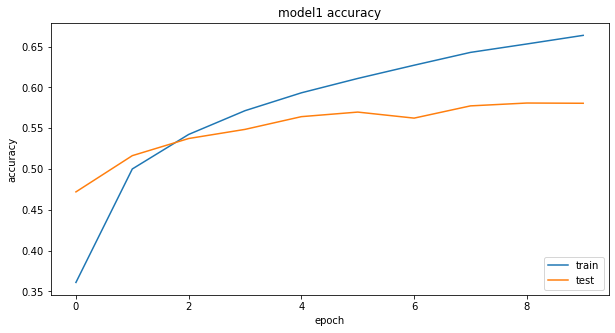

In [21]:
plt.figure(figsize=(10,5))
plt.plot(model.history.history['accuracy'])
plt.plot(model.history.history['val_accuracy'])
plt.title('model1 accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')
plt.show()

In [8]:
model2 = Sequential()

# convolutional layer
model2.add(Conv2D(50, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu', input_shape=(32, 32, 3)))

# convolutional layer
model2.add(Conv2D(75, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'))
model2.add(MaxPool2D(pool_size=(2,2)))
model2.add(Dropout(0.25))

model2.add(Conv2D(125, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'))
model2.add(MaxPool2D(pool_size=(2,2)))
model2.add(Dropout(0.25))

# flatten output of conv
model2.add(Flatten())

# hidden layer
model2.add(Dense(500, activation='relu'))
model2.add(Dropout(0.4))
model2.add(Dense(250, activation='relu'))
model2.add(Dropout(0.3))

# output layer
model2.add(Dense(10, activation='softmax'))

# compiling the sequential model
model2.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')


In [9]:
model2.fit(X_train, Y_train, batch_size=128, epochs=10, validation_data=(X_test, Y_test))

Epoch 1/10
391/391 [==============================] - 141s 359ms/step - loss: 1.8426 - accuracy: 0.3143 - val_loss: 1.1896 - val_accuracy: 0.5845
Epoch 2/10
391/391 [==============================] - 144s 368ms/step - loss: 1.1652 - accuracy: 0.5859 - val_loss: 0.9223 - val_accuracy: 0.6795
Epoch 3/10
391/391 [==============================] - 162s 415ms/step - loss: 0.9497 - accuracy: 0.6658 - val_loss: 0.8536 - val_accuracy: 0.7030
Epoch 4/10
391/391 [==============================] - 168s 429ms/step - loss: 0.8258 - accuracy: 0.7129 - val_loss: 0.7567 - val_accuracy: 0.7410
Epoch 5/10
391/391 [==============================] - 172s 441ms/step - loss: 0.7314 - accuracy: 0.7453 - val_loss: 0.7005 - val_accuracy: 0.7579
Epoch 6/10
391/391 [==============================] - 167s 428ms/step - loss: 0.6634 - accuracy: 0.7697 - val_loss: 0.6981 - val_accuracy: 0.7574
Epoch 7/10
391/391 [==============================] - 165s 422ms/step - loss: 0.6100 - accuracy: 0.7861 - val_loss: 0.6659 -

In [11]:
print(model2.history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


In [12]:
import matplotlib.pyplot as plt

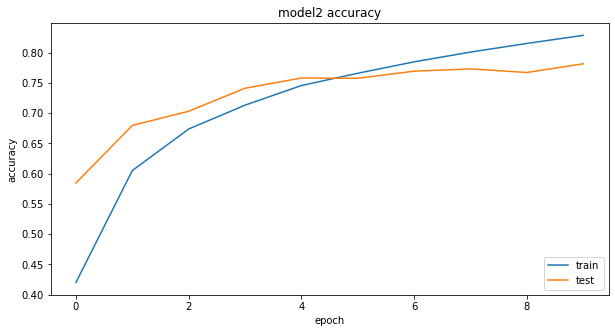

In [22]:
plt.figure(figsize=(10,5))
plt.plot(model2.history.history['accuracy'])
plt.plot(model2.history.history['val_accuracy'])
plt.title('model2 accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')
plt.show()

## We see that how extra Convolutional layers work better to filter out features and help achieve better accuracy !

### A simple ANN with just one ReLU hidden layer and softmax output layer would perform even worse.